# Logistic Regression

## Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Importing the dataset

In [14]:
dataset=pd.read_csv('Iris.csv')

In [15]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Split the data into dependent and independent variables

In [18]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
X=dataset[['SepalLengthCm', 
           'SepalWidthCm',
           'PetalLengthCm', 'PetalWidthCm']]

In [20]:
y=dataset[['Species']]

In [21]:
X.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
123,6.3,2.7,4.9,1.8


In [22]:
y.sample()

,Species
16,Iris-setosa


## Handling Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y=LE.fit_transform(y.values.ravel())

In [26]:
y[100:105]

array([2, 2, 2, 2, 2])

- Iris-setosa - class 0
- Iris-versicolor - class 1
- Iris-virginica - class 2

## Splitting the dataset into the Training set and Test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)

## Training the Logistic Regression model on the Training set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
classifier=LogisticRegression(max_iter=150)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [31]:
y_pred=classifier.predict(X_test)

## Confusion Matrix and classification report

In [33]:
cm=confusion_matrix(y_test,y_pred)

In [34]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

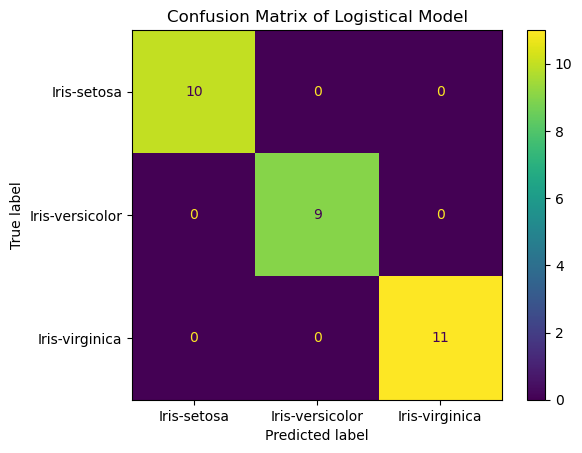

In [39]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=['Iris-setosa', 'Iris-versicolor',
'Iris-virginica'])
disp.plot()
plt.title("Confusion Matrix of Logistical Model")
plt.show()

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

